# Aggregate Course

A collection of thoughts that could go into Vigenttes. 

## Provenance

* Oct 2022


In [1]:
from aggregate import build, pprint, tweedie_convert 
import aggregate as agg

Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


time: 907 ms (started: 2022-10-30 07:38:11 +00:00)


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.000,1.000,0.000,0.000,0.000,,
Freq,3.500,,,487.950m,,,0.000
Agg,3.500,3.500,222.045a,487.950m,487.950m,888.178a,0.000


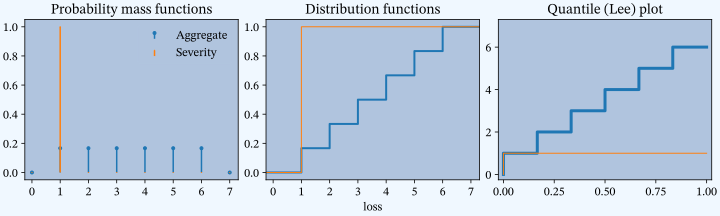

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,1.000,,,0.000,,,
Agg,3.500,3.500,-111.022a,487.950m,487.950m,222.045a,0.000


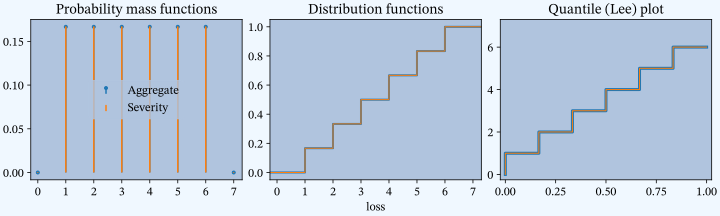

time: 1.02 s (started: 2022-10-30 07:38:20 +00:00)


In [3]:
# THIS IS THE WAY TO GO!! 
ans, df = build.show('Dice')

In [4]:
filename = '../../aggregate/agg/test_suite.agg'
filename = Path(filename)
filename.exists()

True

time: 0 ns (started: 2022-10-30 07:39:25 +00:00)


In [5]:
build.logger_level(30)

time: 0 ns (started: 2022-10-30 07:39:28 +00:00)


In [6]:
df = build.interpreter_file(filename=filename)
df

,kind,error,name,output,preprocessed program,program
index,,,,,,
0,sev,0,One,"{'sev_name': 'dhistogram', 'sev_xs': [1.0], 'sev_ps': [1.0], 'name': 'One', ...",sev One dsev [1],same
1,agg,0,a.Novice.Dice.Roll,"{'name': 'a.Novice.Dice.Roll', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0...",agg a.Novice.Dice.Roll dfreq [1:6] dsev [1] note...,same
2,agg,0,a.Novice.Dice.Roll2,"{'name': 'a.Novice.Dice.Roll2', 'freq_name': 'empirical', 'freq_a': [1.0], '...",agg a.Novice.Dice.Roll2 dfreq [1] dsev [1:6] note...,same
3,agg,0,a.Novice.2.Rolls,"{'name': 'a.Novice.2.Rolls', 'freq_name': 'empirical', 'freq_a': [2.0], 'fre...",agg a.Novice.2.Rolls dfreq [2] dsev [1:6] note...,same
4,agg,0,a.Novice.5.Rolls,"{'name': 'a.Novice.5.Rolls', 'freq_name': 'empirical', 'freq_a': [5.0], 'fre...",agg a.Novice.5.Rolls dfreq [5] dsev [1:6] note...,same
...,...,...,...,...,...,...
150,agg,0,L.Personal.Auto,"{'name': 'L.Personal.Auto', 'exp_el': 10000000.0, 'exp_attachment': 0.0, 'ex...",agg L.Personal.Auto 10e6 loss 300e3 xs 0 sev lognorm 45e3 cv 20....,same
151,agg,0,L.Comm.Umbrella,"{'name': 'L.Comm.Umbrella', 'exp_el': [6000000.0, 3000000.0, 1000000.0], 'ex...",agg L.Comm.Umbrella [6e6 3e6 1e6] loss [1e6 4e6 5e6] xs [1e6 1e6 5e6] ...,same
152,agg,0,L.Comm.Property,"{'name': 'L.Comm.Property', 'exp_el': [7000000.0, 3000000.0], 'exp_attachmen...",agg L.Comm.Property [7e6 3e6] loss 100e6 xs 0 sev 100e6 * beta 0.1 cv [1....,same


time: 156 ms (started: 2022-10-30 07:39:33 +00:00)


In [7]:
# build all the objects and pull out some demographics 
df['log2'] = 0
df['bs'] = 0.
df['agg_m'] = 0.
df['agg_cv'] = 0.
df['agg_sd'] = 0.
df['emp_m'] = 0.
df['emp_cv'] = 0.
df['emp_sd'] = 0.
df0 = df.query('error==0 and kind=="agg"').copy()
ans = {}
for n, p in df0['preprocessed program'].head().items():
    try:
        ans[n] = a = build(p, approximation='exact')
    except Exception as e:
        print(f'{n}: exception {e}')
    else:
        m, cv = a.describe.loc['Agg', ['Est E(X)', 'Est CV(X)']]
        df0.loc[n, ['log2', 'bs', 'agg_m', 'agg_cv', 'agg_sd',
                    'emp_m', 'emp_cv', 'emp_sd']] = (
            a.log2, a.bs, a.agg_m, a.agg_cv, a.agg_sd, m, cv, '')
        pprint(p)

agg a.Novice.Dice.Roll dfreq [1:6] dsev [1]
agg a.Novice.Dice.Roll2 dfreq [1] dsev [1:6]
agg a.Novice.2.Rolls dfreq [2] dsev [1:6]
agg a.Novice.5.Rolls dfreq [5] dsev [1:6]
agg a.Novice.1~6.Rolls dfreq [1:6] dsev [1:6]
time: 171 ms (started: 2022-10-30 07:40:58 +00:00)


In [8]:
df0[['preprocessed program', 'log2', 'bs',
            'agg_m',
             'emp_m',
             'agg_cv',
             'emp_cv',
             'agg_sd',
             'emp_sd']].head()

,preprocessed program,log2,bs,agg_m,emp_m,agg_cv,emp_cv,agg_sd,emp_sd
index,,,,,,,,,
1,agg a.Novice.Dice.Roll dfreq [1:6] dsev [1] note...,4,1.000,3.500,3.500,487.950m,487.950m,1.708,
2,agg a.Novice.Dice.Roll2 dfreq [1] dsev [1:6] note...,4,1.000,3.500,3.500,487.950m,487.950m,1.708,
3,agg a.Novice.2.Rolls dfreq [2] dsev [1:6] note...,5,1.000,7.000,7.000,345.033m,345.033m,2.415,
4,agg a.Novice.5.Rolls dfreq [5] dsev [1:6] note...,6,1.000,17.500,17.500,218.218m,218.218m,3.819,
5,agg a.Novice.1~6.Rolls dfreq [1:6] dsev [1:6],7,1.000,12.250,12.250,553.283m,553.283m,6.778,


time: 16 ms (started: 2022-10-30 07:41:10 +00:00)


In [25]:
# example building more than one thing at a time? 
sam1 = build('agg SAM dfreq [1 2 3] [1/2 1/4 1/4] dsev [1:4]')
sam2 = build('agg SAMEX dfreq [1 2 12] [1/2 1/4 1/4] dsev [1:10]')

TypeError: descriptor 'agg_1' for 'MomentAggregator' objects doesn't apply to a 'MomentAggregator' object

time: 16 ms (started: 2022-10-25 19:06:11 +01:00)


In [ ]:
sam1

In [ ]:
sam2.describe

In [ ]:
sam1.pdf(4.4), sam1.pdf(4), sam1.pmf(4), sam1.pdf(4.5), sam1.pmf(4.5)

In [ ]:
sam1.cdf(4), sam1.cdf(4.5), sam1.cdf(5), sam1.sf(5)

In [ ]:
sam1.q(0.996), sam1.q(sam1.cdf(5)), sam1.cdf(11), sam1.cdf(12), sam1.q(1), sam1.q(0)

In [ ]:
sam2.plot()

In [ ]:
f, axd = make_mosaic_figure('AC\nBC', (8, 5))
sam1.plot(axd=axd)
for ax in axd.values():
    ax.grid(lw=.25, c='w')
# axd['A'].set(yscale='log')

In [ ]:
sam1.statistics_df

In [ ]:
pd.concat((sam1.statistics, sam2.statistics), axis=1)

In [ ]:
sam2.report_df

In [ ]:
ps = [.95, .99, .996, .999, 1]
print([sam2.q(p) for p in ps])
pd.concat((sam2.price(p, Distortion('dual', 1.75)) for p in ps), keys=ps, names=['p', 'line'])

In [ ]:
sam1.density_df.query('p>0')

In [ ]:
sam1.pdf(3), sam1.cdf(3), sam1.sf(3), sam1.cdf(5), sam1.cdf(5.5), sam1.cdf(6)

In [ ]:
sam1.density_df

In [ ]:
sam1.q(sam1.cdf(5.5))

In [ ]:
sam2 = build('agg B dfreq [1 2 3] dsev [2 4 8]')

In [ ]:
p = Portfolio('samp', [sam1, sam2])

In [ ]:
p

In [ ]:
p.update(bs=1,log2=9)

In [ ]:
p.audit_df

In [ ]:
s = sam1

In [ ]:
p.describe

In [ ]:
p.update(9, 1, remove_fuzz=True)

In [ ]:
sam1.plot()

In [ ]:
p.plot()

In [ ]:
sam1.audit_df

In [ ]:
p.audit_df

In [ ]:
a1 = build('agg A1 30 claims sev lognorm 20 cv [.25 .5 .75] wts=3 mixed gamma .3')

In [ ]:
a1.describe

In [ ]:
g1 = build('agg ONE 1 claim sev 100 * weibull_min 1.5 fixed')

In [ ]:
g1.plot()

In [ ]:
s1 = build('sev S 400 * gamma 2')

In [ ]:
s1.plot()

In [ ]:
g1.bs

In [ ]:
par = build('agg P1 1 claim sev 2000 * pareto 3 - 2000 fixed') #, log2=16, bs=.25)

In [ ]:
par

In [ ]:
par.plot()

In [ ]:
from aggregate import build
import aggregate as agg

In [ ]:
uw = agg.Underwriter()

In [30]:
build

time: 0 ns (started: 2022-10-25 12:19:44 +01:00)


In [31]:
build.programs

,kind,clean program,note
name,,,
TEST,sev,sev TEST lognorm 20 cv .3,
TESTs,sev,sev TESTs lognorm 20 cv .3,
BODOFF1,port,"port BODOFF1 agg Bodoff.wind dfreq [1] dsev [0, 99] [0.80, 0.20] agg Bodof...",Bodoff Thought Experiment No. 1
PIR.Cat.NonCat.Gross,port,port PIR.Cat.NonCat.Gross agg CNC.NonCat 1 claim sev gamma 80 cv 0.15 fixe...,PIR Cat-Noncat gross case study.
PIR.Cat.NonCat.Net,port,port PIR.Cat.NonCat.Net agg CNC.Net.NonCat 1 claim sev gamma 80 cv 0.15 fi...,PIR Cat-Noncat net case study.
PIR.Discrete,port,port PIR.Discrete agg Discrete.X1 1 claim dsev [0 8 10] [1/2 1/4 1/4] fixe...,PIR Discrete case study. Change 8 to 9 for the equal points example.
PIR.HU.SCS.Gross,port,port PIR.HU.SCS.Gross agg SCS 70 claims sev exp(-1.9**2 / 2) * lognorm 1.9...,PIR Hurricane SCS gross case study.
PIR.HU.SCS.Net,port,port PIR.HU.SCS.Net agg Net.SCS 70 claims sev exp(-1.9**2 / 2) * lognorm 1...,PIR Hurricane SCS net case study.
PIR.Tame,port,port PIR.Tame agg Tame.A 1 claim sev gamma 50 cv 0.10 fixed agg Tame.B 1 c...,PIR Tame case study. For reinsurance see text.


time: 16 ms (started: 2022-10-25 12:19:51 +01:00)


In [25]:
build.list()

spec  \
kind name                                                                                                             
agg  Basic.Dice.Roll                {'name': 'Basic.Dice.Roll', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3...   
     Basic.Poisson.Dice.Rolls       {'name': 'Basic.Poisson.Dice.Rolls', 'exp_en': 5.0, 'sev_name': 'dhistogram'...   
     Basic.Tweedie                  {'name': 'Basic.Tweedie', 'exp_en': 70.10637160891034, 'freq_name': 'poisson...   
     Basic.Twelve.Dice.Rolls        {'name': 'Basic.Twelve.Dice.Rolls', 'freq_name': 'empirical', 'freq_a': [5.0...   
     InsCo.Commercial.Auto.MED      {'name': 'InsCo.Commercial.Auto.MED', 'exp_en': 1.0, 'sev_name': 'expon', 's...   
     InsCo.Commercial.Liability     {'name': 'InsCo.Commercial.Liability', 'exp_el': 10000000.0, 'exp_attachment...   
     InsCo.Commercial.Professional  {'name': 'InsCo.Commercial.Professional', 'exp_el': 10000000.0, 'exp_attachm...   
     InsCo.Commercial.Property      {'name': 'InsCo.Commercial.Property', 'exp_el': [7000000.0, 3000000.0], 'exp...   
     InsCo.Commercial.Umbrella      {'name': 'InsCo.Commercial.Umbrella', 'exp_el': [6000000.0, 3000000.0, 10000...   
     InsCo.Homeowners               {'name': 'InsCo.Homeowners', 'exp_el': [8000000.0, 2000000.0], 'exp_attachme...   
     InsCo.Personal.Auto            {'name': 'InsCo.Personal.Auto', 'exp_el': 10000000.0, 'exp_attachment': 0.0,...   
     TEST                           {'name': 'TEST', 'exp_en': 1.0, 'sev_name': 'lognorm', 'sev_mean': 20.0, 'se...   
     US.Hurricane                   {'name': 'US.Hurricane', 'exp_en': 1.79, 'exp_attachment': 0.0, 'exp_limit':...   
     US.SCS                         {'name': 'US.SCS', 'exp_en': 37.5, 'exp_attachment': 0.0, 'exp_limit': 50000...   
port BODOFF1                        {'spec': [('agg', 'Bodoff.wind', {'name': 'Bodoff.wind', 'freq_name': 'empir...   
     PIR.Cat.NonCat.Gross           {'spec': [('agg', 'CNC.NonCat', {'name': 'CNC.NonCat', 'exp_en': 1.0, 'sev_n...   
     PIR.Cat.NonCat.Net             {'spec': [('agg', 'CNC.Net.NonCat', {'name': 'CNC.Net.NonCat', 'exp_en': 1.0...   
     PIR.Discrete                   {'spec': [('agg', 'Discrete.X1', {'name': 'Discrete.X1', 'exp_en': 1.0, 'sev...   
     PIR.HU.SCS.Gross               {'spec': [('agg', 'SCS', {'name': 'SCS', 'exp_en': 70.0, 'sev_name': 'lognor...   
     PIR.HU.SCS.Net                 {'spec': [('agg', 'Net.SCS', {'name': 'Net.SCS', 'exp_en': 70.0, 'sev_name':...   
     PIR.Tame                       {'spec': [('agg', 'Tame.A', {'name': 'Tame.A', 'exp_en': 1.0, 'sev_name': 'g...   
sev  TEST                           {'sev_name': 'lognorm', 'sev_mean': 20.0, 'sev_cv': 0.3, 'sev_scale': 1.0, '...   
     TESTs                          {'sev_name': 'lognorm', 'sev_mean': 20.0, 'sev_cv': 0.3, 'sev_scale': 1.0, '...   

                                                                                                            program  
kind name                                                                                                            
agg  Basic.Dice.Roll                agg Basic.Dice.Roll dfreq  [1:6]  dsev  [1]                       note{The r...  
     Basic.Poisson.Dice.Rolls       agg Basic.Poisson.Dice.Rolls 5 claims dsev  [1:6]  poisson      note{The sum...  
     Basic.Tweedie                  agg Basic.Tweedie tweedie 100 1.1 1.0                         note{Tweedie d...  
     Basic.Twelve.Dice.Rolls        agg Basic.Twelve.Dice.Rolls dfreq  [5]  dsev  [1:6]               note{Sum o...  
     InsCo.Commercial.Auto.MED      agg InsCo.Commercial.Auto.MED 1 claim sev  [2.764e3 24.548e3 275.654e3 1.917...  
     InsCo.Commercial.Liability     agg InsCo.Commercial.Liability     10e6 loss 1e6 xs 0   sev lognorm 100e3 cv...  
     InsCo.Commercial.Professional  agg InsCo.Commercial.Professional  10e6 loss 5e6 xs 0   sev lognorm 850e3 cv...  
     InsCo.Commercial.Property      agg InsCo.Commercial.Property  [7e6 3

time: 31 ms (started: 2022-10-25 12:18:31 +01:00)


In [32]:
build.write('US.Hurricane')

US.Hurricane


[                                                                                    Type
 Item                                                                                    
 kind                                                                                 agg
 name                                                                        US.Hurricane
 spec                                                                      <class 'dict'>
 program  agg US.Hurricane 1.79 claims 1e12 xs 0 sev exp(19.595) * lognorm 2.581 poiss...
 object                                       <class 'aggregate.distributions.Aggregate'>]

time: 156 ms (started: 2022-10-25 12:20:30 +01:00)


In [18]:
a = build('agg TEST 1 claims sev.TEST poisson')
a

15:10.845|2794|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.293560379208524 shape from sev_cv 0.3


agg TEST 1 claims sev.TEST poisson
('sev', 'TEST')


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,20.000,20.000,-708.329p,300.000m,300.000m,278.968n,927.000m
Freq,1.000,,,1.000,,,1.000
Agg,20.000,19.958,-2.120m,1.044,1.041,-2.777m,1.138


time: 219 ms (started: 2022-10-25 12:15:10 +01:00)


In [17]:
s = build('sev TEST lognorm 20 cv .3')
s

15:06.921|2794|Level 31  | aggregate.distributions, __init__|  sev_a not set, determined as 0.293560379208524 shape from sev_cv 0.3


sev TEST lognorm 20 cv .3


<aggregate.distributions.Severity object at 0x00000196F4486AC0> of type lognorm

time: 0 ns (started: 2022-10-25 12:15:06 +01:00)


In [3]:
s.long_name

'TEST: lognorm'

time: 0 ns (started: 2022-10-25 12:06:08 +01:00)


In [2]:
build

time: 0 ns (started: 2022-10-24 22:29:57 +01:00)


In [3]:
build.knowledge.head()

spec  \
kind name                                                                                                         
agg  Basic.Dice.Roll            {'name': 'Basic.Dice.Roll', 'freq_name': 'empirical', 'freq_a': [1.0, 2.0, 3...   
     Basic.Poisson.Dice.Rolls   {'name': 'Basic.Poisson.Dice.Rolls', 'exp_en': 5.0, 'sev_name': 'dhistogram'...   
     Basic.Tweedie              {'name': 'Basic.Tweedie', 'exp_en': 70.10637160891034, 'freq_name': 'poisson...   
     Basic.Twelve.Dice.Rolls    {'name': 'Basic.Twelve.Dice.Rolls', 'freq_name': 'empirical', 'freq_a': [5.0...   
     InsCo.Commercial.Auto.MED  {'name': 'InsCo.Commercial.Auto.MED', 'exp_en': 1.0, 'sev_name': 'expon', 's...   

                                                                                                        program  
kind name                                                                                                        
agg  Basic.Dice.Roll            agg Basic.Dice.Roll dfreq  [1:6]  dsev  [1]                       note{The r...  
     Basic.Poisson.Dice.Rolls   agg Basic.Poisson.Dice.Rolls 5 claims dsev  [1:6]  poisson      note{The sum...  
     Basic.Tweedie              agg Basic.Tweedie tweedie 100 1.1 1.0                         note{Tweedie d...  
     Basic.Twelve.Dice.Rolls    agg Basic.Twelve.Dice.Rolls dfreq  [5]  dsev  [1:6]               note{Sum o...  
     InsCo.Commercial.Auto.MED  agg InsCo.Commercial.Auto.MED 1 claim sev  [2.764e3 24.548e3 275.654e3 1.917...

time: 15 ms (started: 2022-10-24 22:29:57 +01:00)


In [4]:
build.describe('agg').head()

,Type,ELoss,Severity,ESev,SevCV,Sev_a,Freq,EN,Freq_a,Notes
Name,,,,,,,,,,
Basic.Dice.Roll,agg,-0.000,dhistogram,,,,empirical,-1,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]",The roll of a single dice.
Basic.Poisson.Dice.Rolls,agg,0.000,dhistogram,,,,poisson,5.000,,The sum of the rolls of Poisson(5) die. Note mass at zero.
Basic.Tweedie,agg,0.000,gamma,,,9.000,poisson,70.106,,"Tw(p=1.1, μ=100.0, σ^2=1.0) --> CP(λ=70.106372, ga(α=9.0000, β=6.3096), scal..."
Basic.Twelve.Dice.Rolls,agg,-0.000,dhistogram,,,,empirical,-1,[5.0],Sum of the rolls of twelve die. Close to normal.
InsCo.Commercial.Auto.MED,agg,0.000,expon,,,1.000,fixed,1.000,,Use log2=18 and bs=500 or apply limits. Source: Example from Mixed Exponenti...


time: 15 ms (started: 2022-10-24 22:29:57 +01:00)


In [5]:
build.programs.head()

,kind,note,clean program
name,,,
BODOFF1,port,Bodoff Thought Experiment No. 1,"port BODOFF1 agg Bodoff.wind dfreq [1] dsev [0, 99] [0.80, 0.20] agg Bodof..."
PIR.Cat.NonCat.Gross,port,PIR Cat-Noncat gross case study.,port PIR.Cat.NonCat.Gross agg CNC.NonCat 1 claim sev gamma 80 cv 0.15 fixe...
PIR.Cat.NonCat.Net,port,PIR Cat-Noncat net case study.,port PIR.Cat.NonCat.Net agg CNC.Net.NonCat 1 claim sev gamma 80 cv 0.15 fi...
PIR.Discrete,port,PIR Discrete case study. Change 8 to 9 for the equal points example.,port PIR.Discrete agg Discrete.X1 1 claim dsev [0 8 10] [1/2 1/4 1/4] fixe...
PIR.HU.SCS.Gross,port,PIR Hurricane SCS gross case study.,port PIR.HU.SCS.Gross agg SCS 70 claims sev exp(-1.9**2 / 2) * lognorm 1.9...


time: 15 ms (started: 2022-10-24 22:29:57 +01:00)


In [6]:
from aggregate import dbuild

time: 0 ns (started: 2022-10-24 22:29:57 +01:00)


<AxesSubplot:title={'center':'BiTVaR, 0.300'}>

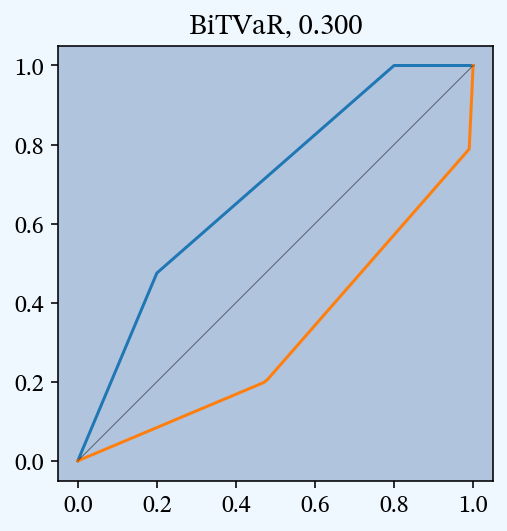

time: 125 ms (started: 2022-10-24 22:30:58 +01:00)


In [9]:
build('distortion MINE bitvar .3 [.2 .8]', log_level=30).plot()

<AxesSubplot:title={'center':'Wang-normal, 1.300'}>

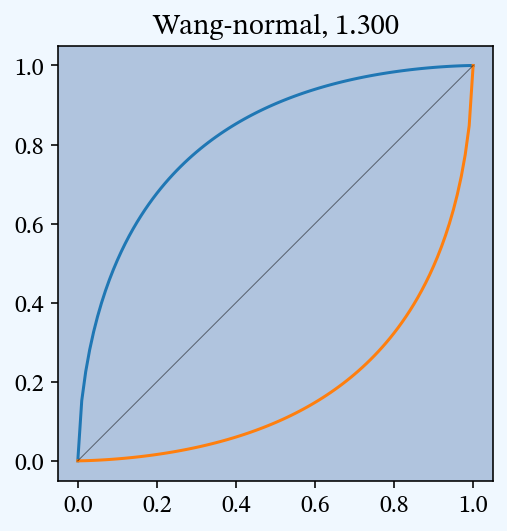

time: 125 ms (started: 2022-10-24 22:31:42 +01:00)


In [14]:
build('distortion ONE wang 1.3').plot()

In [15]:
build.logger_level(40)
s2 = build.write('agg SAM dfreq [1 2 3] [.5 .25 .25] dsev [1 2 3]\n'
                 'distortion ONE wang 1.3\n'
                 'agg TWO dfreq [1] dsev [3]')
s2

{('agg',
  'SAM'): WriteAnswer(kind='agg', name='SAM', spec={'name': 'SAM', 'freq_name': 'empirical', 'freq_a': array([         1,          2,          3]), 'freq_b': array([       0.5,       0.25,       0.25]), 'exp_en': -1, 'sev_name': 'dhistogram', 'sev_xs': array([         1,          2,          3]), 'sev_ps': array([   0.33333,    0.33333,    0.33333]), 'note': ''}, program='agg SAM dfreq  [1 2 3]   [.5 .25 .25]  dsev  [1 2 3]', object=<aggregate.distributions.Aggregate object at 0x0000021C659BEDD0> name: SAM),
 ('distortion',
  'ONE'): WriteAnswer(kind='distortion', name='ONE', spec={'name': 'wang', 'shape': 1.3}, program='distortion ONE wang 1.3', object=wang (1.3)),
 ('agg',
  'TWO'): WriteAnswer(kind='agg', name='TWO', spec={'name': 'TWO', 'freq_name': 'empirical', 'freq_a': array([         1]), 'freq_b': array([         1]), 'exp_en': -1, 'sev_name': 'dhistogram', 'sev_xs': array([         3]), 'sev_ps': array([         1]), 'note': ''}, program='agg TWO dfreq  [1]  dsev  [3

time: 125 ms (started: 2022-10-24 22:31:50 +01:00)


In [22]:
[(k, type(v)) for k, v in s2.items()]

[(('agg', 'SAM'), aggregate.underwriter.WriteAnswer),
 (('distortion', 'ONE'), aggregate.underwriter.WriteAnswer),
 (('agg', 'TWO'), aggregate.underwriter.WriteAnswer)]

time: 0 ns (started: 2022-10-24 22:34:06 +01:00)


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,2.000,2.000,0.000,408.248m,408.248m,666.134a,6.527f
Freq,1.750,,,473.804m,,,493.382m
Agg,3.500,3.500,-222.045a,565.445m,565.445m,-4.552f,645.053m


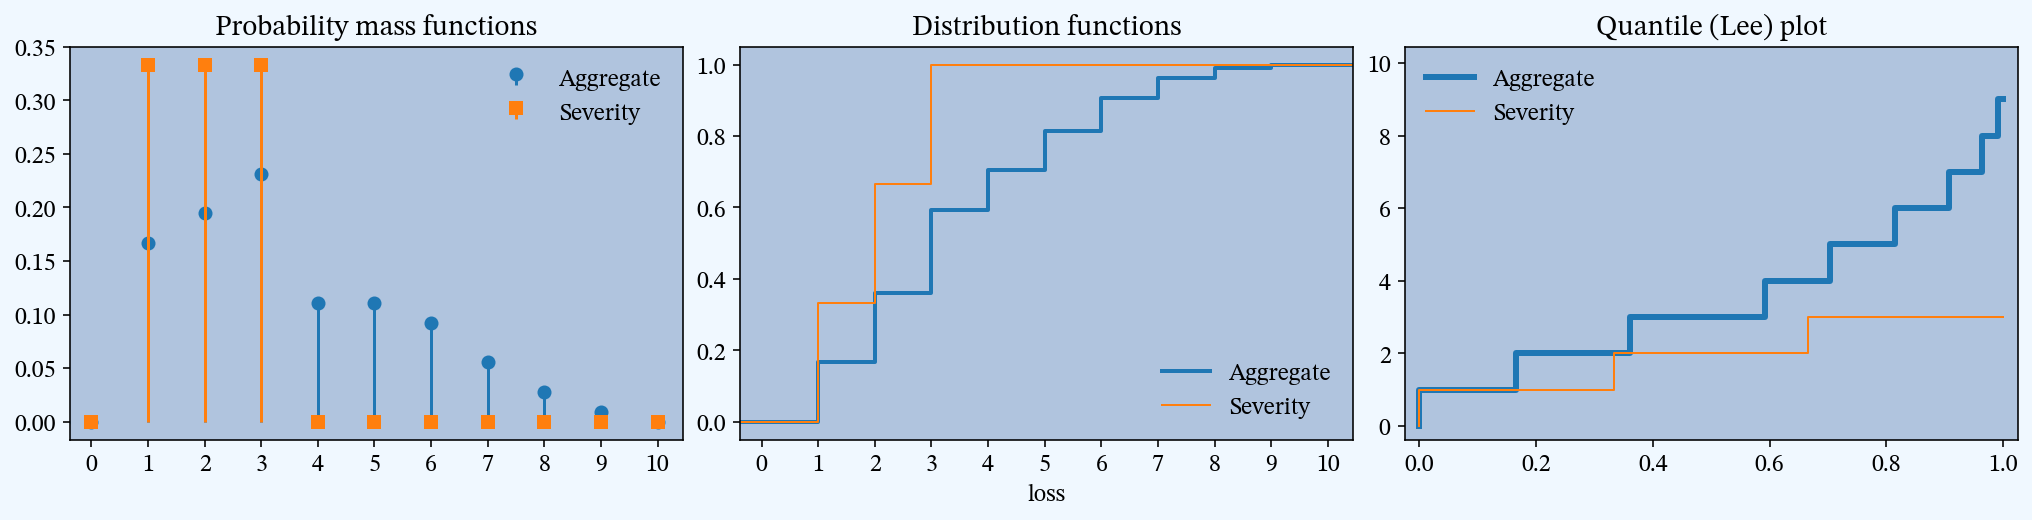

time: 594 ms (started: 2022-10-24 22:34:13 +01:00)


In [23]:
sam = build('agg SAM dfreq [1 2 3] [.5 .25 .25] dsev [1 2 3]')
sam.plot()
sam

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,2.000,2.000,0.000,408.248m,408.248m,666.134a,6.527f
Freq,1.750,,,755.929m,,,755.929m
Agg,3.500,3.500,-29.395n,816.497m,816.496m,-132.552n,899.813m


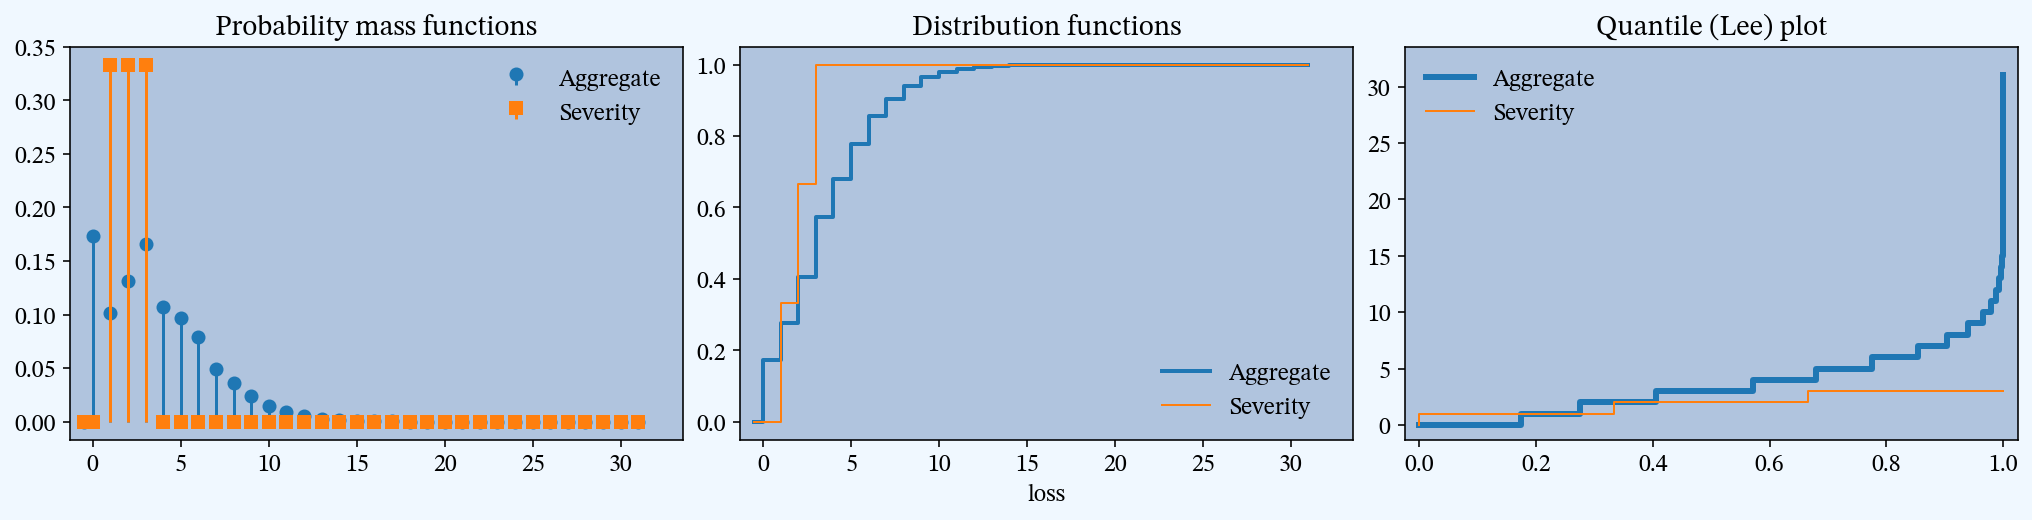

time: 546 ms (started: 2022-10-24 22:34:17 +01:00)


In [24]:
sam2 = build('agg SAM2 1.75 claims dsev [1 2 3] poisson', bs=1, log2=5)
sam2.plot()
sam2

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,1.500,1.500,0.000,471.405m,471.405m,0.000,1.061
Freq,1.750,,,473.804m,,,493.382m
Agg,2.625,2.625,-222.045a,592.852m,592.852m,-1.887f,836.385m


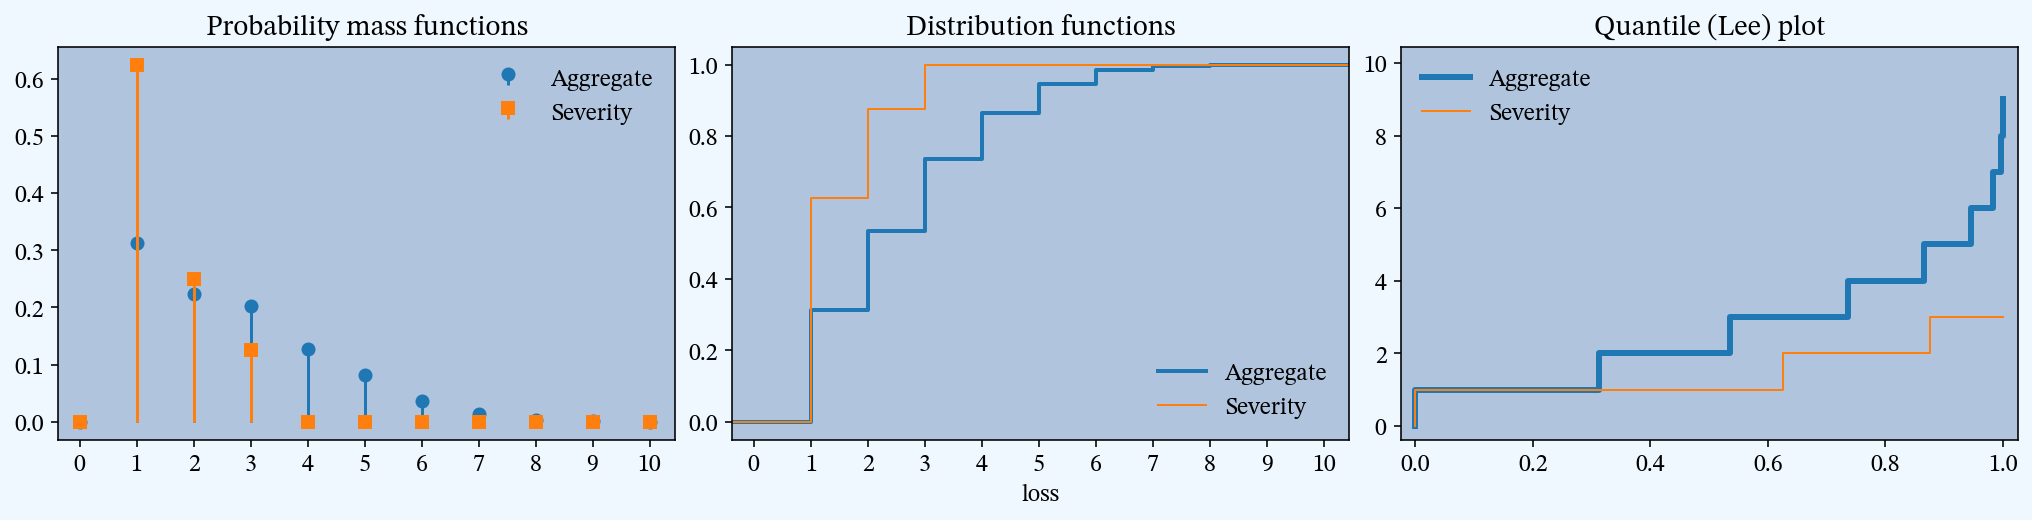

time: 547 ms (started: 2022-10-24 22:34:17 +01:00)


In [25]:
sam = build('agg SAM dfreq [1 2 3] [1/2 1/4 1/4] dsev [1 2 3] [5/8 1/4 1/8]')
sam.plot()
sam

,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,3.500,3.500,0.000,487.950m,487.950m,-333.067a,0.000
Freq,3.500,,,487.950m,,,0.000
Agg,12.250,12.250,222.045a,553.283m,553.283m,10.436f,286.888m


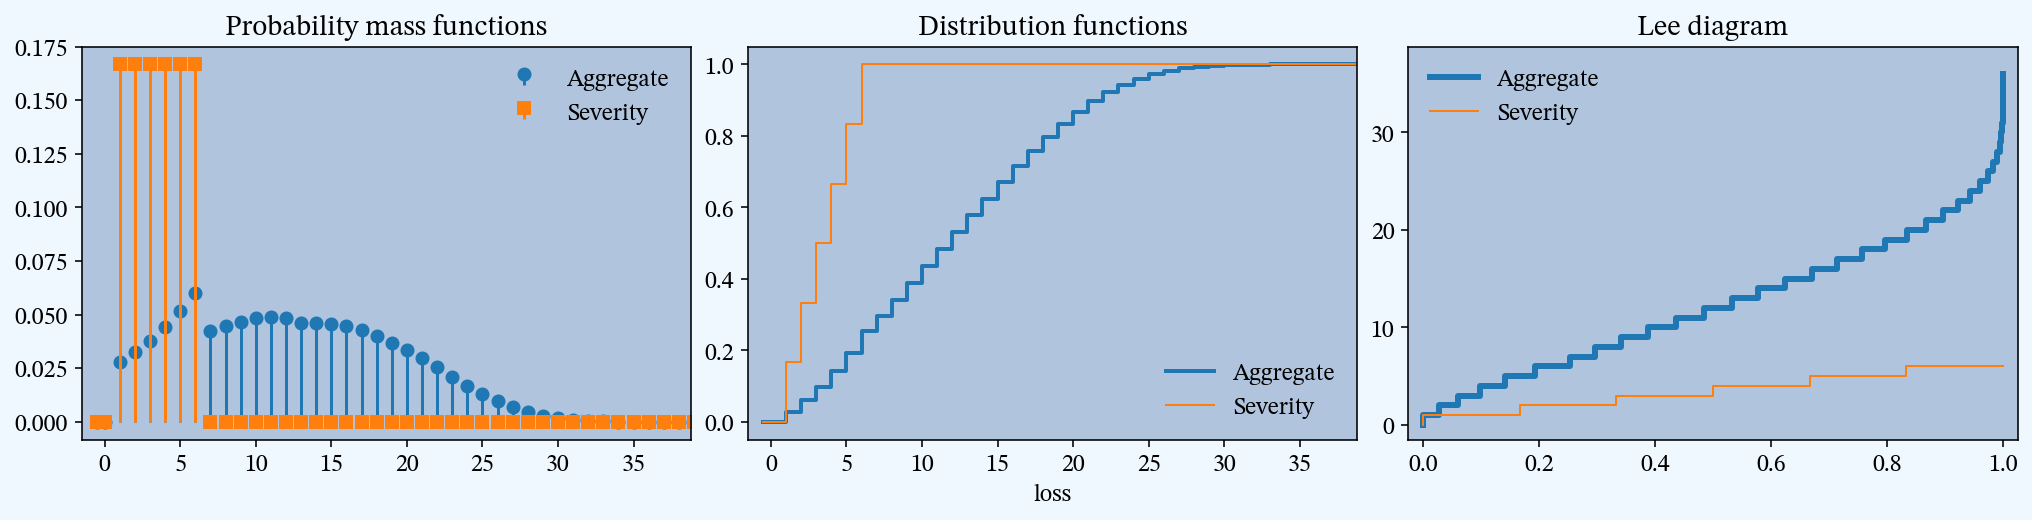

time: 547 ms (started: 2022-10-15 17:49:34 +01:00)


In [25]:
dice = build('agg DICE dfreq [1:6] dsev [1:6]')
dice.plot()
dice

In [26]:
dice.q(1)

36.0

time: 0 ns (started: 2022-10-15 17:50:14 +01:00)
